In [ ]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Data Preprocessing

#### Explore the Dataset

In [ ]:
#read data

raw_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv")
print(raw_data.head(5))
print(raw_data.shape)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
(3276, 10)


##### Water attributes

* **pH**: The pH level of the water.
* **Hardness**: Water hardness, a measure of mineral content.
* **Solids**: Total dissolved solids in the water.
* **Chloramines**: Chloramines concentration in the water.
* **Sulfate**: Sulfate concentration in the water.
* **Conductivity**: Electrical conductivity of the water.
* **Organic_carbon**: Organic carbon content in the water.
* **Trihalomethanes**: Trihalomethanes concentration in the water.
* **Turbidity**: Turbidity level, a measure of water clarity.
* **Potability**: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

In [ ]:
#empty values
raw_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#drop the missing values
data = raw_data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

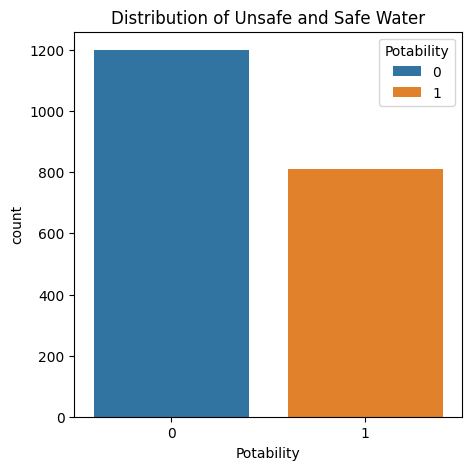

In [ ]:
#potability distribution

plt.figure(figsize=(5,5))
sns.countplot(data, x="Potability", hue="Potability")
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

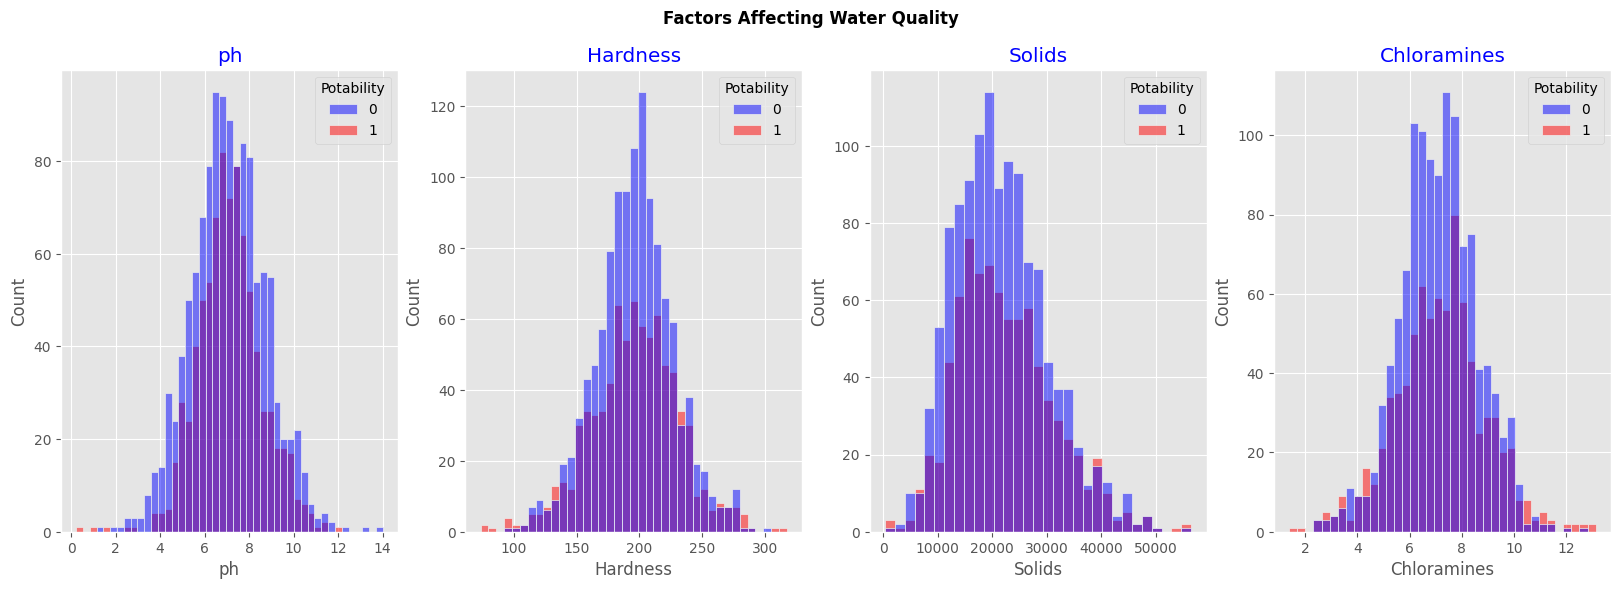

In [ ]:
#Factors Affecting Water Quality: pH, Hardness, Solids, Chloramines

plt.figure(figsize=(20,6))
plt.style.use('ggplot')
plt.suptitle('Factors Affecting Water Quality', color='black', weight='bold')
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.histplot(data, x=data.columns[i], hue=data["Potability"], palette=['blue', 'red'])

  plt.title(data.columns[i], color='blue')

##### Guidelines for Safe Water
* **pH**: According to WHO, drinkable water has pH ranging from 6.5 to 8.5
* **Hardness**: 120 mg/L to 170 mg/L
* **Chloramines**: upto 4 mg/L

Note: The units were not specified for **Solids**. According to EPA, the total dissolved solids in drinkable water is 500 mg/L.

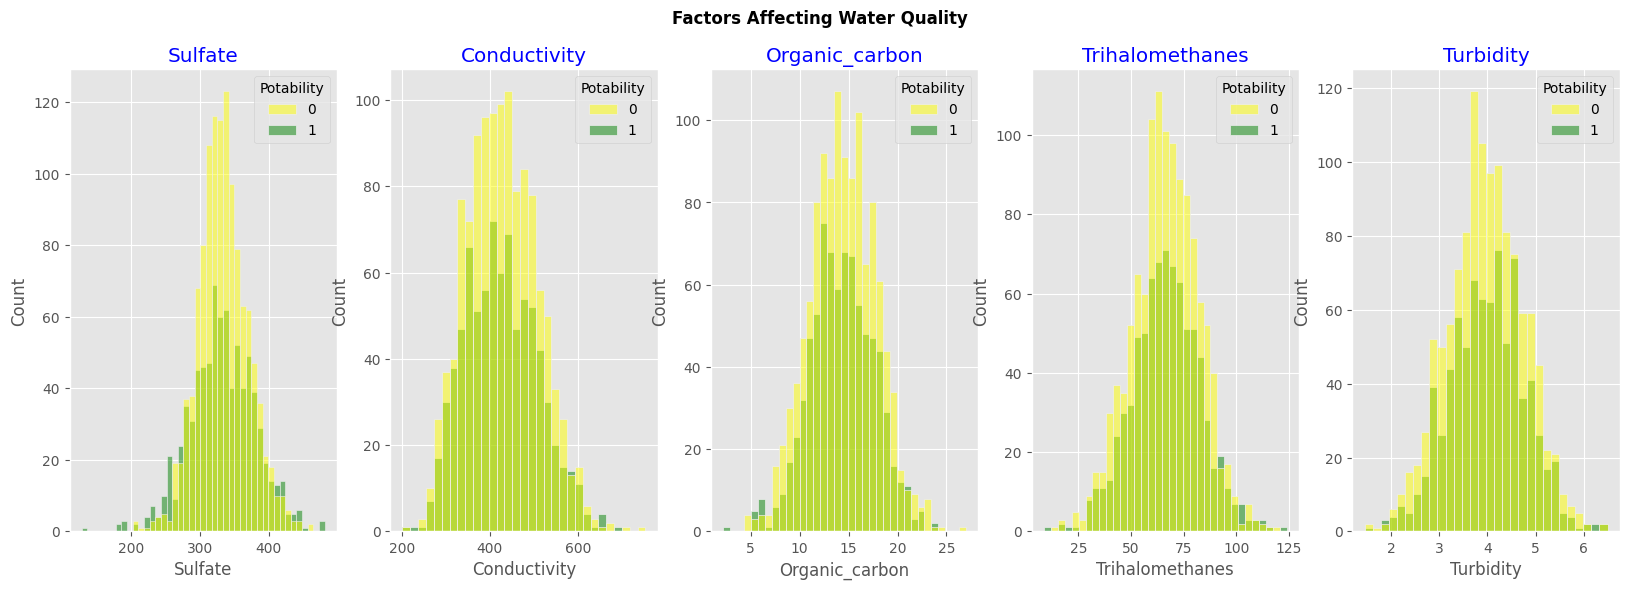

In [ ]:
#Factors Affecting Water Quality: Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity
plt.figure(figsize=(20,6))
plt.suptitle('Factors Affecting Water Quality', color='black', weight='bold')

for i in range(4,9):
  plt.subplot(1, 5, i-3)
  sns.histplot(data, x=data.columns[i], hue=data["Potability"], palette=['yellow', 'green'])

  plt.title(data.columns[i], color='blue')

##### Continuation

* **Sulfate**: Less than 250 mg/L
* **Conductivity**: No universal agreed range, low conductivity preferred
* **Trihalomethanes**: less than 80 μg/l
* **Turbidity**: should not exceed 5 NTU (Nephelometric Turbidity unit)

Note: Not enough information was provided for Organic Carbon.

### Handling Missing Variables

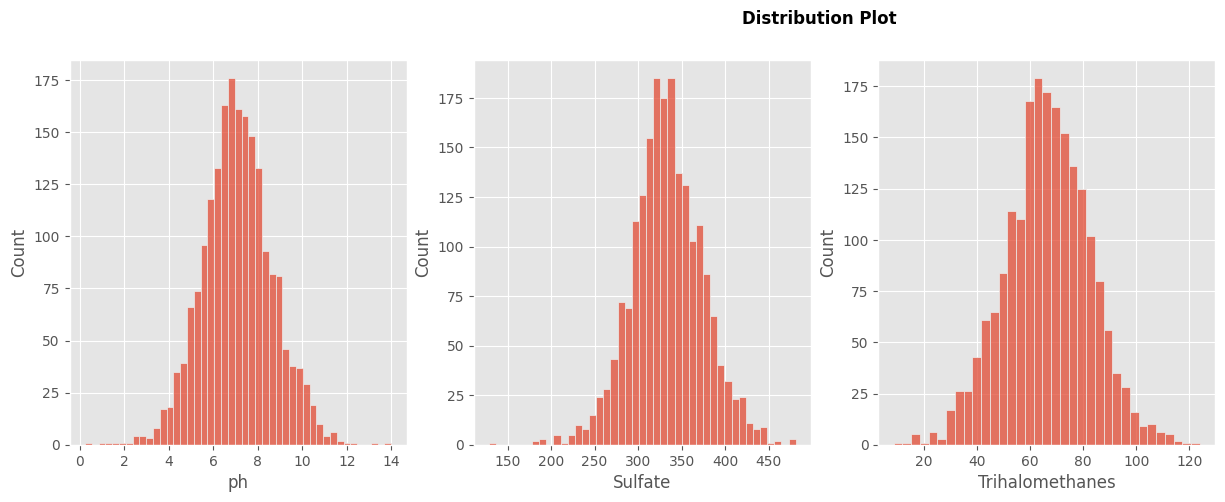

In [ ]:
missing_data = ['ph', 'Sulfate', 'Trihalomethanes']

plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.suptitle('Distribution Plot', color='black', weight='bold')

for null_val in range(3):
  plt.subplot(1, 4, null_val+1)
  sns.histplot(data[missing_data[null_val]], kde=False)


plt.show()

#### Normality Test

In [ ]:
import scipy.stats as stats

#statistic test for ph, Sulfate and Trihalomethanes for the possible mean imputation
def norm_test(column):
  col = raw_data[column].dropna()
  res = stats.normaltest(col)
  print("-- {} --".format(column))
  print("pvalue: {}".format(res.pvalue))

for item in (missing_data):
  norm_test(item)

-- ph --
pvalue: 2.995003083667747e-08
-- Sulfate --
pvalue: 1.4822930521865367e-06
-- Trihalomethanes --
pvalue: 0.007575858106428041


#### Check for outliers

<ipython-input-22-0685f6798ad6>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, null_val+1)


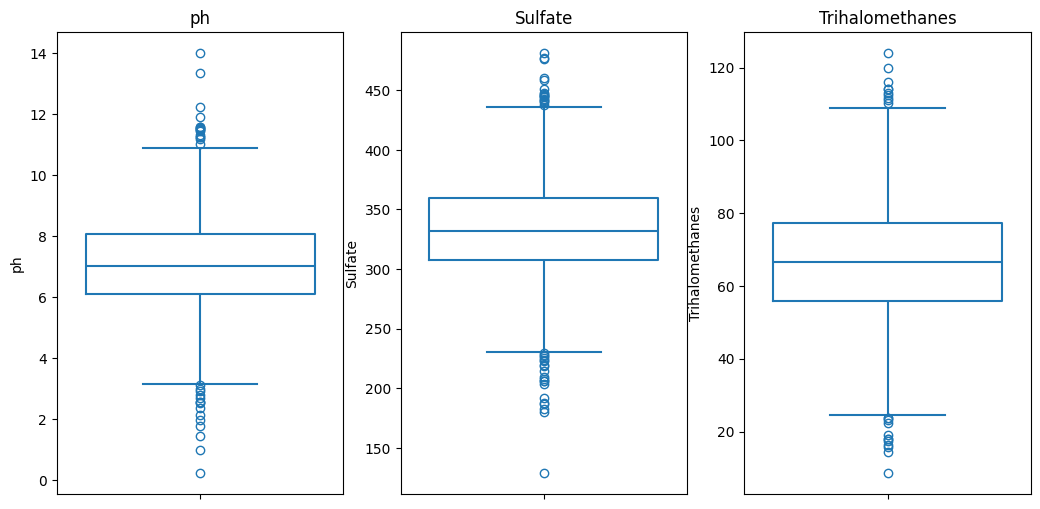

In [ ]:
#boxplot

plt.figure(figsize=(17, 6))
plt.style.use('default')
plt.title("Boxplot Plot")

for null_val in range(3):
  plt.subplot(1, 4, null_val+1)
  sns.boxplot(data[missing_data[null_val]], fill=False)
  plt.title(missing_data[null_val])


plt.show()

In [ ]:
#perform median imputation

raw_data['ph'].fillna(data['ph'].mean(), inplace=True)
raw_data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)
raw_data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)

raw_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
raw_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.081573,196.369496,22014.092526,7.122277,333.644393,426.205111,14.284970,66.396519,3.966786,0.390110
std,1.469957,32.879761,8768.570828,1.583085,36.143375,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085990,196.967627,20927.833607,7.130299,333.224672,421.884968,14.218338,66.400859,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Modeling

Use Machine Learning to predict water potability

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#### Using the imputed dataset

In [ ]:
#prepare data
features = raw_data.columns[:9]
X = raw_data[features]
y = raw_data["Potability"]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.2)

# experiment with models and check for best
models = {"random forest": RandomForestClassifier(random_state=1),
          "decision tree": DecisionTreeClassifier(random_state=1),
          "logistic regression": LogisticRegression(random_state=1)}

In [ ]:
for name, model in models.items():

  model.fit(train_X, train_y)
  prediction = model.predict(val_X)

  #evalaution metrics
  val = mean_absolute_error(val_y, prediction)
  acc = accuracy_score(val_y, prediction)

  print("{}: mean_abs_error: {} acc: {}". format(name, round(val, 3), round(acc, 3)))

random forest: mean_abs_error: 0.36 acc: 0.64
decision tree: mean_abs_error: 0.407 acc: 0.593
logistic regression: mean_abs_error: 0.43 acc: 0.57


#### Confusion Matrix

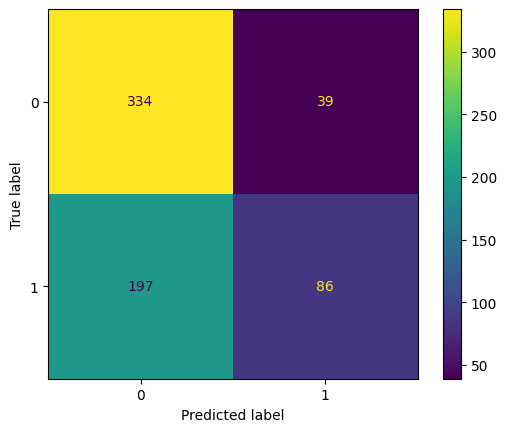

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion matrix

rfc = RandomForestClassifier(random_state=1)
rfc.fit(train_X, train_y)

prediction = rfc.predict(val_X)

conf_mat = confusion_matrix(val_y, prediction)

cm_display = ConfusionMatrixDisplay(conf_mat).plot()
plt.grid(False)

### Conclusion

**Addressing the limitations of the Analysis:**

**Sample Size**: Although the dataset comprising 3200 observations offers valuable insights, it's important to acknowledge the potential limitations associated with sample size. Utilizing larger datasets would likely yield more robust and generalizable results, enabling better representation of the population.

**Imputation Method**: While median imputation was chosen as a pragmatic solution due to non-normality and the presence of outliers, it's worth noting that more advanced imputation techniques, such as leveraging machine learning algorithms to fill missing data points, could be explored in future analyses. These methods might provide more nuanced and accurate imputations, enhancing the reliability of the results.

**Model Performance**: In my experimental approaches, I found that while feature engineering showed promise, it also led to overfitting the data. This highlights the importance of having a sufficiently large sample size to effectively employ such techniques. With a larger dataset, feature engineering could be a viable option for improving model performance while avoiding overfitting.

**Generalizability**: It's important to recognize that the findings of this analysis may be specific to the dataset.